In [ ]:
#import libraries 
import matplotlib.pyplot as plt
import imageio
import numpy as np
from skimage import io, color
import cv2

In [ ]:
def image_init_resize():
  image = io.imread("image.jpg")
  new_image = cv2.resize(image, (512,512))
  new_image_array = np.array(new_image, dtype=int)
  fixed_image_arr = new_image_array[:, :, 0]
  return fixed_image_arr, image

In [ ]:
def sub_sample(D,image_array, function):
  new_size = image_array.shape / np.power(D, 1)
  new_image = np.zeros((int(new_size[0]), int(new_size[1])))
  for k in range(0, image_array.shape[0], D):
    for l in range(0, image_array.shape[1], D):
      val_vector = []
      for i in range(k, k+D):
        for j in range(l, l+D):
          val_vector.append(image_array[i][j])
      new_i = int(k / D)
      new_j = int(l / D)
      new_image[new_i, new_j] = function(val_vector)
  return new_image

In [ ]:
def reconstruction(image_arr_list):
  recon_list = []
  for b in range(1,9):
    D = 2**b
    image = image_arr_list[b-1]
    new_size = [image.shape[0]*D, image.shape[1]*D]
    new_image = np.zeros((int(new_size[0]), int(new_size[1])))
    for i in range(0, int(new_size[0])):
      for j in range(0, int(new_size[1])):
        new_image[i][j] = image[int(i / D), int(j / D)]
    recon_list.append(new_image)
  return recon_list

In [ ]:
def mse_error_calc(image_array, recon_image_array):
  image_array_flat = image_array.flatten()
  recon_image_array_flat = recon_image_array.flatten()
  err = np.sum((image_array_flat - recon_image_array_flat) ** 2)
  err /= (image_array.shape[0] * image_array.shape[1])
  return err

In [ ]:
def mad_error_calc(image_array, recon_image_array):
  image_array_flat = image_array.flatten()
  recon_image_array_flat = recon_image_array.flatten()
  err = np.sum(np.abs(image_array_flat - recon_image_array_flat))
  err /= (image_array.shape[0] * image_array.shape[1])
  return err

In [ ]:
def mse_sub_print(image_arr, subsampled_arr_mse):
  plt.figure(figsize=(20,8))
  for i in range(1,9):
    D = 2**i
    subsampled_arr_mse.append(sub_sample(D, image_arr, np.average))
    plt.subplot(2,4,i)
    plt.imshow(subsampled_arr_mse[i-1], cmap="gray")
    plt.title("D = " + str(D) + " MSE sub-sampling", fontweight="bold")
  plt.show()
  return subsampled_arr_mse

In [ ]:
def mse_recon_print(subsampled_arr_mse):
  recon_image_arr = reconstruction(subsampled_arr_mse);
  plt.figure(figsize=(20,8))
  for i in range(1,9):
    plt.subplot(2,4,i)
    plt.imshow(recon_image_arr[i-1], cmap="gray")
    plt.title("D = " + str(2**i) + " MSE reconstruction", fontweight="bold")
  plt.show()
  return recon_image_arr

In [ ]:
def mad_sub_print(image_arr, subsampled_arr_mad):
  image_arr, img = image_init_resize()
  subsampled_arr_mad = []
  plt.figure(figsize=(20,8))
  for i in range(1,9):
    D = 2**i
    subsampled_arr_mad.append(sub_sample(D, image_arr, np.median))
    plt.subplot(2,4,i)
    plt.imshow(subsampled_arr_mad[i-1], cmap="gray")
    plt.title("D = " + str(D) + " MAD sub-sampling", fontweight="bold")
  plt.show()
  return subsampled_arr_mse

In [ ]:
def mad_recon_print(subsampled_arr_mad):
  recon_image_arr = reconstruction(subsampled_arr_mad);
  plt.figure(figsize=(20,8))
  for i in range(1,9):
    plt.subplot(2,4,i)
    plt.imshow(recon_image_arr[i-1], cmap="gray")
    plt.title("D = " + str(2**i) + " MAD reconstruction", fontweight="bold")
  plt.show()
  return recon_image_arr

In [ ]:
def error_print(image_arr, recon_arr_mse, recon_arr_mad):
  mse_error_arr = []
  plt.figure(figsize=(12,5))

  for i in range(1,9):
    recon_image = recon_arr_mse[i-1]
    mse_error_arr.append(mse_error_calc(image_arr, recon_image))
  plt.subplot(1,2,1)
  plt.plot([2**i for i in range(1,9)], mse_error_arr, "o", color="green")
  plt.title("MSE as a function of D")
  plt.xlabel("D value")
  plt.ylabel("MSE")

  mad_error_arr = []
  for i in range(1,9):
    recon_image = recon_arr_mad[i-1]
    mad_error_arr.append(mad_error_calc(image_arr, recon_image))
  plt.subplot(1,2,2)
  plt.plot([2**i for i in range(1,9)], mad_error_arr, "o", color="red")
  plt.title("MAD as a function of D")
  plt.xlabel("D value")
  plt.ylabel("MAD")

  plt.show()

In [ ]:
image_arr, img = image_init_resize()
subsampled_arr_mse = []
subsampled_arr_mad = []

First, we resized our image and changed its dimensions to 512x512.
Then, we refered $D=Nₓ=N_y=2^b$, for $b∈{1,...,8}$.

We obtained the following results for the requested ${J̃_i}_(i=1)^8$:

```
# This is formatted as code
```



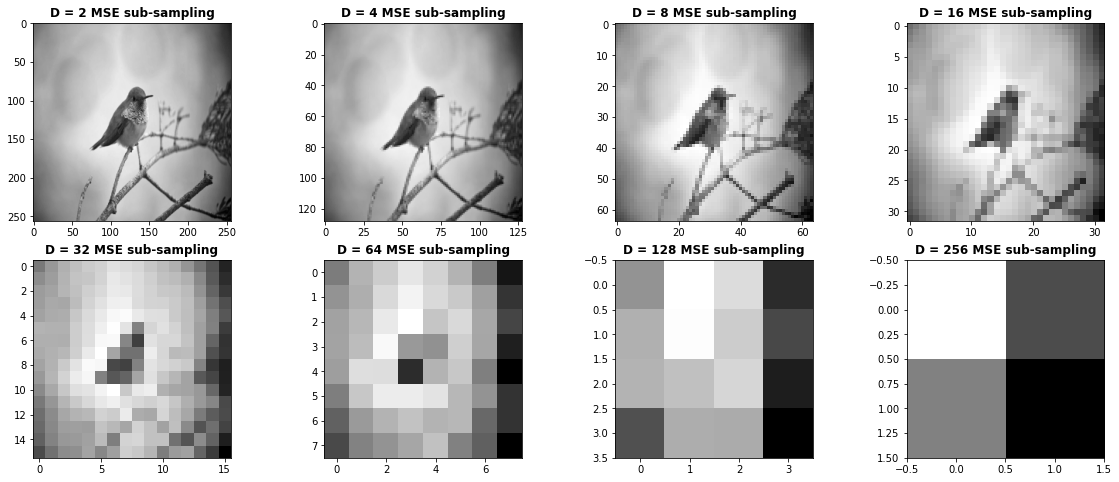

In [ ]:
subsampled_arr_mse = mse_sub_print(image_arr, subsampled_arr_mse)

Next, We got the following results for the requested ${Ĵ_i}(i=1)^8$:

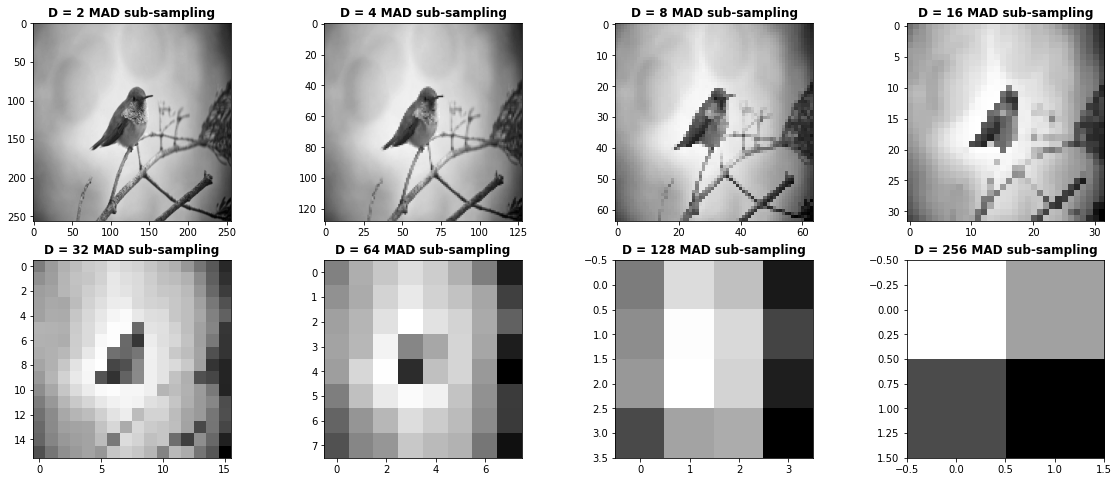

In [ ]:
subsampled_arr_mad = mad_sub_print(image_arr, subsampled_arr_mad)

Observing the two sets of the sub-sampled images, there are no big differences between them.
In addition, the noticable differences can be seen on images with higher D value, where every rectangular grid sample region is bigger, and in contrast - these differences are hardly noticed on images with lower D value, as also the image is getting sharper and clearer.

After implementing the standard reconstruction, we received the new sets of images ${k̃_i}_(i=1)^8$ and ${k̂_i}(i=1)^8$:

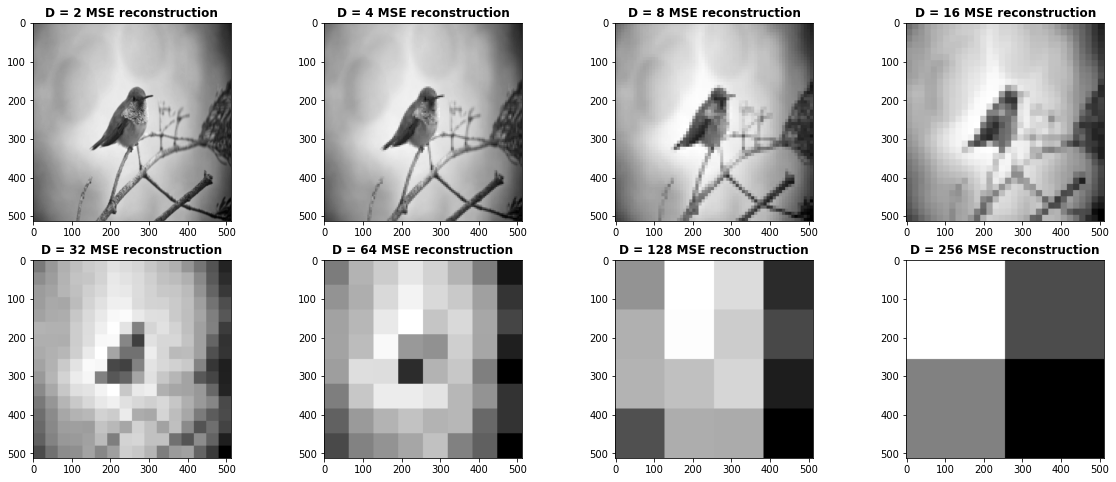

In [ ]:
recon_arr_mse = mse_recon_print(subsampled_arr_mse)

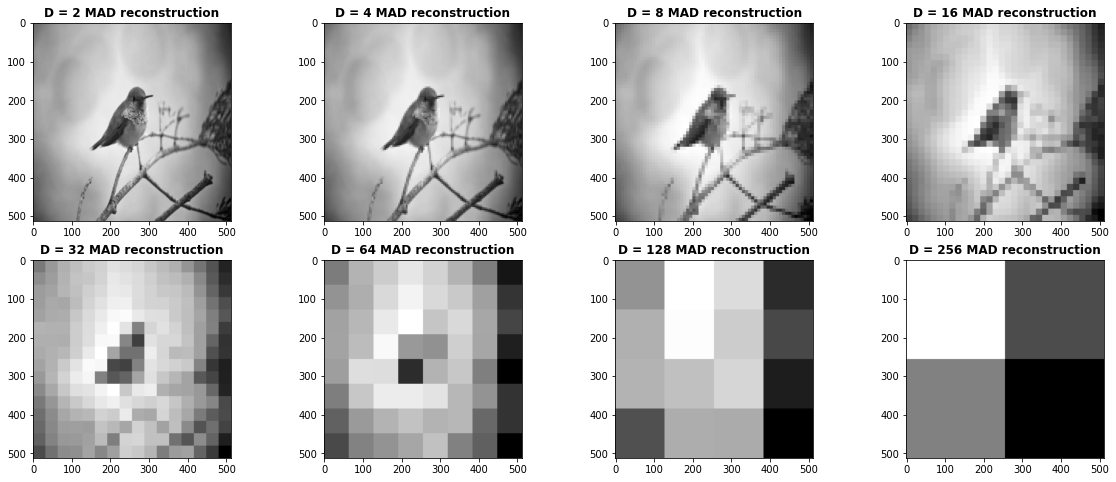

In [ ]:
recon_arr_mad = mad_recon_print(subsampled_arr_mad)

Comparing MSE and MAD of the sub-sampled images, as a function of the factor D, yielded the following graphs:  

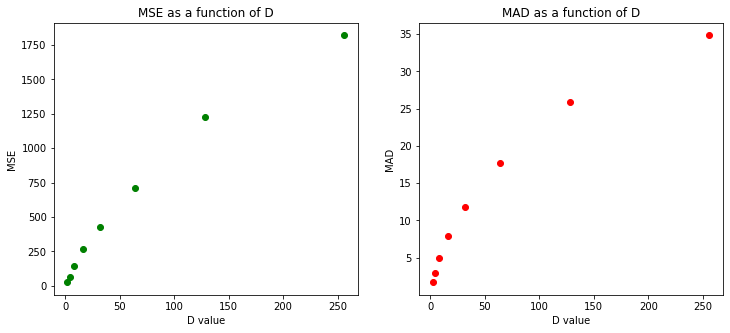

In [ ]:
error_print(image_arr, recon_arr_mse, recon_arr_mad)

The results shown above indicate that the integer sub-sampling factor D affects the clarity of the image - for D=2/4/8 it is still possible to identify the contents of the image, for D=16 it becomes harder to do so, and for D=32/64/128/256 we cannot identify its contents. The aforementioned conclusion is relevent for both MSE and MAD senses.